<a href="https://colab.research.google.com/github/junginkim23/ds-section1-sprint3/blob/master/ai03_sc13x_%EA%B9%80%EC%A0%95%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC13x Linear Algebra

## 1. $\vec{c} \cdot \vec{d}$ 를 구해보세요. 이 두 개의 vector는 orthogonal 관계 (직교)에 있나요? 왜 그런가요? 왜 아닌가요?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [22]:
import numpy as np

c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

np.dot(c,d)

42

### Answer
>orthogonal 관계에 있으려면 두 벡터의 내적이 0이 되야 한다. 하지만 두 벡터의 내적은 *42* 이기 때문에 orthogonal관계에 있다고 할 수 없다.

## 2. $E^{-1}$ 와 $E^{T}$ 를 구하세요.

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [23]:
e = np.array([[7,4,2],[1,3,-1],[2,6,-4]])
e_transpose = e.T
e_inverse = np.linalg.inv(e)

print('inverse',e_inverse,sep='\n')
print('tranpose',e_transpose,sep='\n')

inverse
[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
tranpose
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


## 3. $|F|$ 를 구하세요. 이 데이터는 어떤 의미가 있나요?

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [24]:
#행렬식을 의미
f = np.array([[2,-2,5],[4,1,10],[12,6,30]])

print('determinant:',np.linalg.det(f))

determinant: 0.0


In [25]:
np.linalg.matrix_rank(f)

2

### Ans 
> |F|의 의미는 행렬 F의 determinant라고 한다. 다음으 값은 0이 나오는 것으로 보았을 때 역행렬이 존재하지 않는다는 것을 뜻한다.

> 역행렬이 존재하지 않는다는 것은 연립방정식을 만족하는 유일한 해가 존재하지 않는다는 것을 의미한다.즉, 만족하는 해의 갯수가 무한대(부정) 이거나 없다.(불능)

> 만약 역행렬이 존재하다면 이는 연립방정식을 만족하는 유일해가 존재함을 뜻한다.

## 4. 다음 데이터의 covariance, correlation을 구하세요.

- x = [820, 760, 1250, 990, 1080, 1450, 1600]

- y = [0, 1, 7, 1, 0, 6, 4]

In [26]:
import pandas as pd

x = [820,760,1250,990,1080,1450,1600]
y = [0,1,7,1,0,6,4]

#데이터프레임 만들기
df = pd.DataFrame({'x':x,'y':y})

#공분산
df.cov()

,x,y
x,98761.904762,670.238095
y,670.238095,8.571429


In [27]:
#상관계수
df.corr()

,x,y
x,1.000000,0.728463
y,0.728463,1.000000


## 5. 다음 데이터를 정규화 하세요.

아래 링크를 참조하세요.

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [28]:
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#데이터프레임 -> 행렬
df_f = df.loc[:,'Cheese':].copy()
df_f = np.array(df_f)
print('Data : \n',df_f)

#정규화
scaler = StandardScaler()
Z = scaler.fit_transform(df_f)
print('\n Standardized Data: \n',Z)

Data : 
 [[ 105  245  685  147  193  156  720  253  488  198  360 1102 1472   57
  1374  375   54]
 [ 103  227  803  160  235  175  874  265  570  203  365 1137 1582   73
  1256  475   64]
 [ 103  242  750  122  184  147  566  171  418  220  337  957 1462   53
  1572  458   62]
 [  66  267  586   93  209  139 1033  143  355  187  334  674 1494   47
  1506  135   41]]

 Standardized Data: 
 [[ 0.65827466 -0.01749546 -0.25954622  0.64458535 -0.63242919  0.13055067
  -0.45007561  0.86331183  0.37773603 -0.33626508  0.80547723  0.73740709
  -0.64432226 -0.05191741 -0.43523112  0.10499766 -0.13830319]
 [ 0.53580495 -1.27716878  1.19885635  1.15244047  1.53589947  1.54795798
   0.43569619  1.09352832  1.40168163  0.08406627  1.17160324  0.9292974
   1.67946294  1.60943981 -1.40423624  0.84182336  0.96812236]
 [ 0.53580495 -0.22744102  0.54381113 -0.33205912 -1.09707105 -0.54085279
  -1.33584741 -0.70983418 -0.49636387  1.51319287 -0.87870243 -0.0575671
  -0.85557546 -0.46725672  1.19072664  

## 6. 위 데이터에 PCA 를 적용 후 scatterplot을 그리세요.

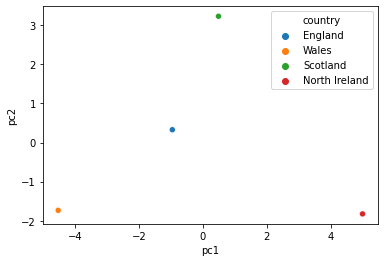

In [30]:
import seaborn as sns

#pca
pca = PCA(2)
pca.fit(Z)

#projected data
B = pca.transform(Z)
B = B.T

#dataframe 생성
pc_df = pd.DataFrame({'country':df['Country'],'pc1':B[0],'pc2':B[1]})
sns.scatterplot(data = pc_df,x = 'pc1',y = 'pc2',hue = 'country')

## 7. 아래 데이터에 대해 k-means clustering을 적용 후, 결과를 그래프로 그리세요.



In [31]:
points = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc13x/data.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [32]:
#k-mean clustering
from sklearn.cluster import KMeans 

x = np.array(points)
Kmeans = KMeans(n_clusters=4)
Kmeans.fit(x)
labels = Kmeans.labels_

print(labels)

[3 0 0 3 0 0 3 3 1 0 0 0 0 0 3 0 3 0 0 2 3 2 2 2 0 0 0 1 0 0 0 0 0 2 0 0 0
 0 1 0 0 2 1 1 1 0 0 0 3 0 2 3 3 1 2 0 0 1 1 3 2 0 3 1 2 1 2 1 3 1 0 0 0 0
 2 2 0 0 1 2 1 0 0 0 1 0 1 0 0 2 1 0 2 0 0 0 0 0 0 0 0 0 3 0 0 2 3 3 3 2 0
 2 0 3 0 0 1 1 2 1 2 0 0 3 0 3 0 2 1 3 0 3 0 3 1 1 0 2 3 0 1 0 0 2 0 1 0 1
 3 0 0 0 3 2 0 1 0 2 0 3 0 0 1 3 2 2 0 1 0 0 3 0 1 2 0 0 0 0 0 3 0 0 0 0 0
 0 3 2 1 0 0 3 2 3 0 1 2 2 0 0]


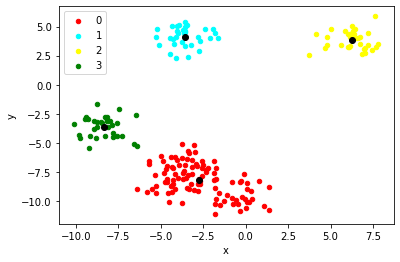

In [33]:
points['cluster'] = labels

import matplotlib.pyplot as plt

#그래프로 시각화
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

def plot_clusters(df, column_header, centroids):
  colors = {0 : 'red', 1 : 'cyan', 2 : 'yellow', 3 : 'green'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok") # 기존 중심점
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  ax.plot(centroids.iloc[3].x, centroids.iloc[3].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
  plt.show()

centroids = get_centroids(points, 'cluster')
plot_clusters(points,'cluster',centroids)

# SC 3점 요구사항:
위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들 중 하나를 만족하는 경우 3점을 얻을 수 있습니다.

아래 요구사항들은 모두 optional 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

- 6번의 PCA 결과에 대해서 Scree plot을 추가하세요.

- 7번에서 k값을 선택하는 과정을 논리적으로 설명하세요.


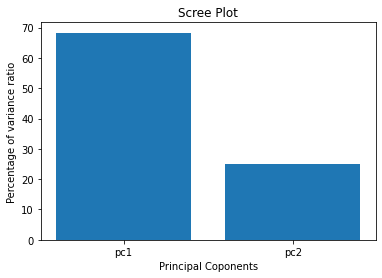

In [34]:
#6번의 PCA결과에 대해서 SCREE PLOT을 추가하세요.
pca_var = np.round(pca.explained_variance_ratio_*100,1)
labels = ['pc1','pc2']
x = [0,1]

plt.bar(x,pca_var,tick_label=labels)
plt.xlabel('Principal Coponents')
plt.ylabel('Percentage of variance ratio')
plt.title('Scree Plot')
plt.show()

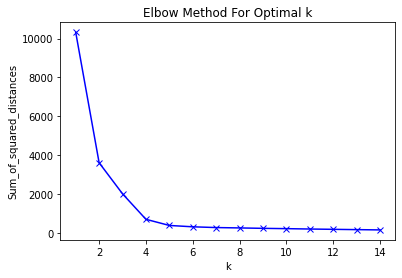

In [35]:
#7번에서 k값을 선택하는 과정을 논리적으로 설명하시오. 
points = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc13x/data.csv')
points.head()

sum_of_squared_distances = []
K = range(1,15)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(points)
  sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

>clustering이 잘 되었다고 하는 것은 결과적으로 cluster 내부에 있는 데이터끼리 유사성이 높아야 한다. 이 말은 곧 데이터끼리의 거리의 합이 작아야 한다는 것과 동일한 말이 된다. 그래서 위의 그림에서 cluster의 개수가 증가함에 따라 거리의 제곱의 합의 결과를 표현한 elbow methods를 사용한 걸 확인할 수 있다. k가 3,4일때 완만해지는 것으로 보인다. 이에 따라 군집의 수를 정한다면 3 혹은 4로 정할 수 있으며, 군집으로 나눈 경우에 각 군집의 의미를 해석하면 더 적합한 군집의 수를 정할 수 있게 된다.